In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
gold=pd.read_csv('/content/gld_price_data.csv')
gold.shape
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#Date is the date in mm/dd/yyyy format
#'SPX' is basically a stock. The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States
#'GLD' is gold price
#'USO' is also a stock. The United States Oil Fund ® LP (USO) is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca.
#'SLV' is silver price
#'EUR/USD' is the ratio of Euro to US dollar
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
gold['Date']=pd.to_datetime(gold['Date'])
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
correlation=gold.corr()
correlation

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

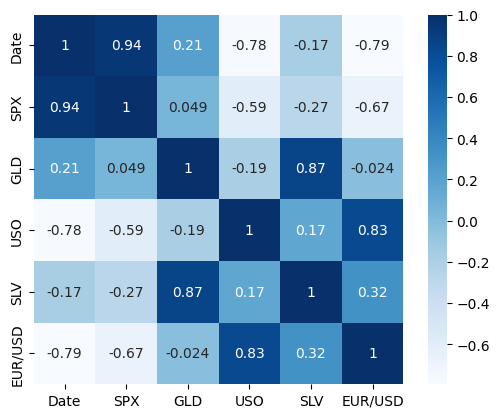

In [10]:
sns.heatmap(correlation,annot=True,square=True,cmap='Blues')

In [11]:
corr_with_gold=correlation['GLD'].drop('GLD')
corr_with_gold


Date       0.209118
SPX        0.049345
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

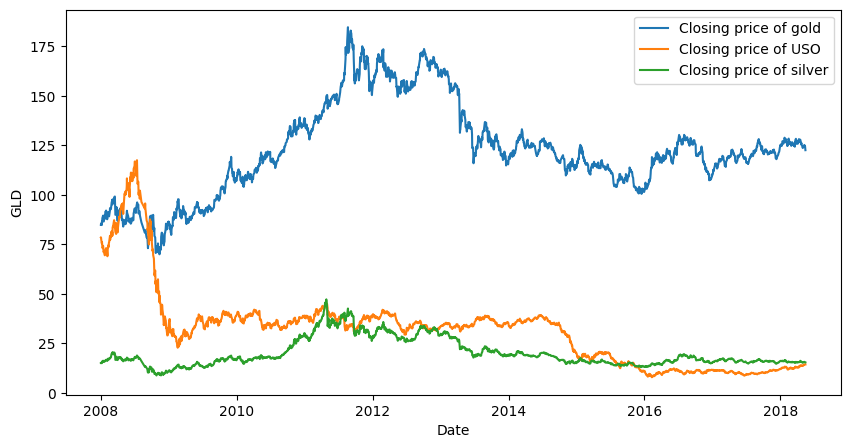

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data=gold,x='Date',y=gold['GLD'],label='Closing price of gold')
sns.lineplot(data=gold,x='Date',y=gold['USO'],label='Closing price of USO')
sns.lineplot(data=gold,x='Date',y=gold['SLV'],label='Closing price of silver')
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [14]:
x=gold.drop(columns={'Date', 'GLD'}, axis=1)
y=gold['GLD']

In [15]:
print(x.shape,y.shape)

(2290, 4) (2290,)


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [17]:
random_model = RandomForestRegressor()

In [18]:
random_model.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
y_train_predicted=random_model.predict(x_train)
y_test_predicted = random_model.predict(x_test)

In [20]:
error1 = metrics.r2_score(y_train, y_train_predicted)
error2 = metrics.r2_score(y_test, y_test_predicted)
print(error1)
print(error2)

0.9985110359261293
0.9890127387487856
